# 0. Introduction

Nature operates according to the principles of **quantum mechanics**, and its mathematical framework is grounded in **linear algebra**. In this chapter, we will delve into the fundamentals of quantum information by constructing a one qubit quantum simulator based entirely on simple linear algebra concepts.

This small-scale simulator will allow us to compute everything exactly. However, simulating quantum systems becomes infeasible beyond approximately 50 qubits, even with advanced supercomputers like Narval, highlighting the potential power of quantum computation.

# 1. Initialize qubit state
#### Qubits and Dirac Notation  

The fundamental building block of a quantum computer is the **qubit**. While in MonarQ, qubits are physically implemented as artificial atom circuits, they are mathematically represented as vectors called **statevectors**. To streamline the representation of these vectors, we use **Dirac notation** (also known as **bra-ket notation**).  

#### Ket: Column Vector
In Dirac notation, $\vert \cdot \rangle$ represents a **ket**, which is a column vector. The two computational basis states of a qubit are written as:  
\begin{equation}
\vert 0 \rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad 
\vert 1 \rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
\end{equation}

#### Bra: Row Vector
The $\langle \cdot \vert$ represents a **bra**, which is the row vector corresponding to the conjugate transpose (Hermitian conjugate) of a ket. For example:  
\begin{equation}
\langle 0 \vert = \begin{pmatrix} 1 & 0 \end{pmatrix}, \quad 
\langle 1 \vert = \begin{pmatrix} 0 & 1 \end{pmatrix}.
\end{equation}

In [1]:
import numpy as np
#In Python, we can define vectors using numpy arrays
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])

#### Superposition : General Qubit State  
A general qubit state is a **linear combination** of the basis states $\vert 0 \rangle$ and $\vert 1 \rangle$:  
\begin{equation}
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle,
\end{equation}
where $\alpha$ and $\beta$ are complex numbers satisfying $|\alpha|^2 + |\beta|^2 = 1$ (to ensure normalization).  

The **bra** corresponding to $\vert \psi \rangle$ is:  
\begin{equation}
\langle \psi \vert = \begin{pmatrix} \alpha^* & \beta^* \end{pmatrix}.
\end{equation}

Here, $\alpha^*$ and $\beta^*$ represent the [complex conjugates](https://en.wikipedia.org/wiki/Complex_conjugate) of $\alpha$ and $\beta$, respectively. This linear combination allows the qubit to exist in a **superposition** of the $\vert 0 \rangle$ and $\vert 1 \rangle$ states, meaning it can simultaneously represent both states with probabilities determined by $|\alpha|^2$ and $|\beta|^2$. **Despite qubits being in a linear combination of states, when measuring the qubit, for example at the end of an algorithm, it will only ever be measured in $\vert 0 \rangle$ or $\vert 1 \rangle$.**

#### Why Dirac Notation?  
Dirac notation provides a compact way to describe and manipulate quantum states mathematically. It simplifies expressing operations like:  
- **Inner products:** $\langle \phi | \psi \rangle$ (measuring overlap between states).  
- **Outer products:** $\vert \psi \rangle \langle \phi \vert$ (representing quantum operators).  

In [11]:
# Define amplitude coefficients
# Make sure that alpha^*alpha + beta^* beta = 1
alpha = 1/2.0
beta = np.sqrt(3)/2* 1j

#Define your superposition state (linear combination)
psi = alpha*ket_0 + beta*ket_1
print(psi)
print(np.conj(psi))

[0.5+0.j        0. +0.8660254j]
[0.5-0.j        0. -0.8660254j]


### Bloch sphere
To visualize single qubit states geometrically, we use the **Bloch sphere**. Any (pure) state can be represented as a point on the surface of the sphere, defined by two angles:

$\theta$ : Specifies the angle between the state and the $\vert{0} \rangle$ axis.

$\phi$ : Specifies the rotation around the z-axis. 

For example, $\vert 0 \rangle$ is the north pole ($\theta = 0$) while $\vert 1\rangle$ is the south pole ($\theta = \pi$). 

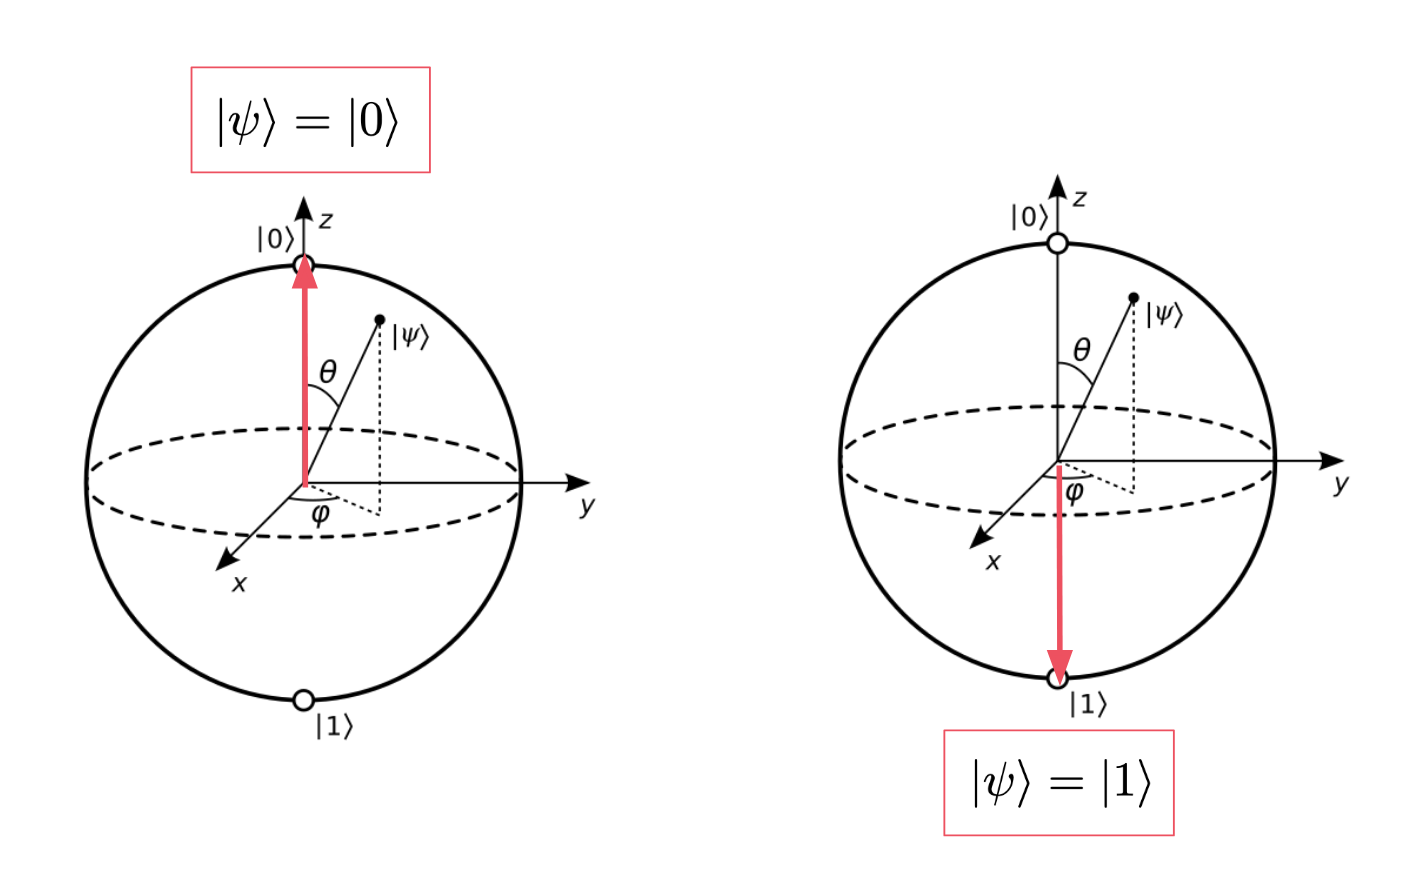

A general superposition lies somewhere on the sphere's surface. For example,
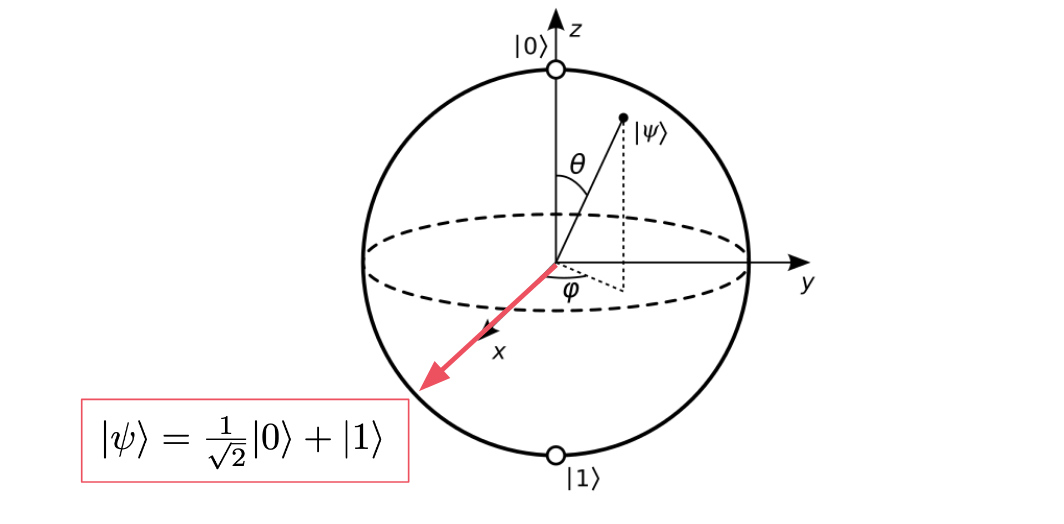

# 2. Operations on qubits

Now that we understand qubits and their ability to exist in **superpositions** of $\vert 0 \rangle$ and $\vert 1 \rangle$, we can represent their states visually on the **Bloch sphere**. But what exactly can we do with these qubits?  

One of the most important tools in quantum computing is the ability to apply **operations** to qubits. These operations are represented as **matrices** that modify the state of the qubit, effectively moving it around the Bloch sphere.  

Let’s explore this by starting with the simplest qubit state, $\vert \psi \rangle = \vert 0 \rangle$. Initially, this state is **not a superposition** and points directly "up" on the Bloch sphere.  

Now, what happens if we apply the following matrix to our qubit state?  

\begin{equation}
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 
1 & -1 \\ 
1 & 1 
\end{pmatrix}
\end{equation} 

EXERCICE

---

Apply the H matrix to a qubit in state $\vert \psi \rangle = \vert 0 \rangle$. You can use  [`np.dot()`](https://numpy.org/doc/2.1/reference/generated/numpy.dot.html) to perform the dot product between two arrays.

In [12]:
#Define state 0
ket_0 = np.array([1,0])

#Define the matrix H
H = 1/np.sqrt(2)*np.array([[1,-1], [1,1]])

#Apply the operation to the qubit
new_ket = np.dot(H, ket_0)
print(new_ket)

[0.70710678 0.70710678]


To print the new statevector in Dirac notation, use the helper function `print_state_vector()` as below. 

In [13]:
from print_latex import print_state_vector

print_state_vector(new_ket)

$$\left|\psi\right\rangle = (0.707107) \left|{0}\right\rangle + (0.707107) \left|{1}\right\rangle$$

\begin{equation}
H \vert 0 \rangle  = \frac{1}{\sqrt{2}}\begin{pmatrix} 
1 & -1\\
1 & 1
\end{pmatrix}\begin{pmatrix} 0 \\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\1\end{pmatrix}  = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)
\end{equation}

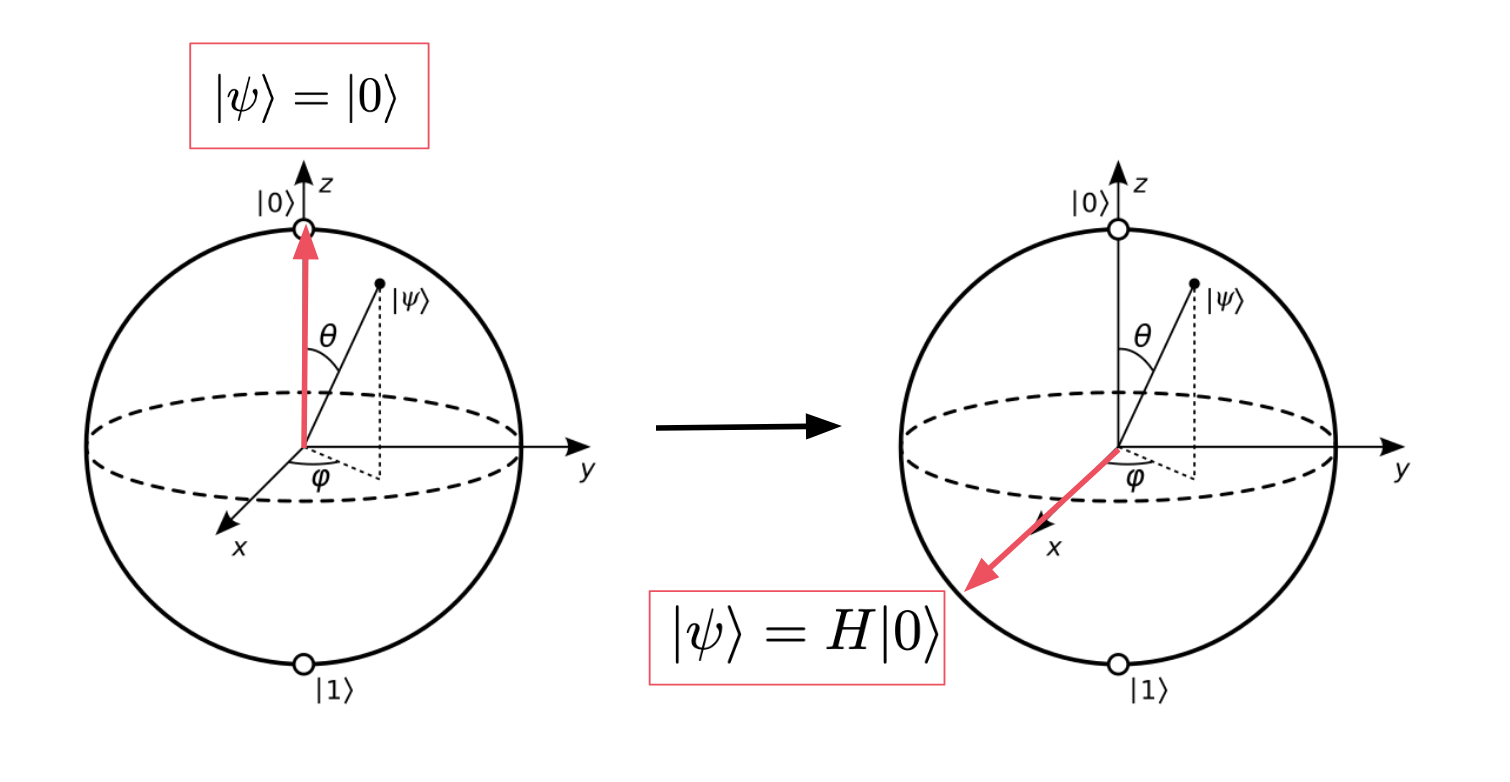

We have created a superposition state by applying a carefully selected matrix to our initial qubit state. This is a special matrix in quantum computing called a **Hadamard gate**. We will discuss it more in the next chapter. 

Applying matrices to vectors might seem abstract but in physical computers like MonarQ, this is achieved by sending precise pulses to qubits. However, when using a quantum computer like MonarQ, this complexity is handled behind the scenes. For users, these pulse operations are abstracted into simple commands, making it easier to focus on building and running quantum algorithms.

# 3. Measurement 
### Probability amplitudes

Consider the general superposition,
\begin{equation}
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle.
\end{equation}

When we measure the qubit in state $\vert \psi \rangle$, it collapses into one of the basis states. The probability of measuring $\vert 0 \rangle$ is given by $\vert \alpha \vert^2$, and the probability of measuring $\vert 1 \rangle$ is $\vert \beta \vert^2$. These probabilities are determined by the squared magnitudes, denoted $| \cdot |^2$, of the complex coefficients $\alpha$ and $\beta$, which we refer to as the **probability amplitudes**.  

\begin{equation}
P(\vert 0 \rangle) = \vert \alpha \vert ^2 = \alpha^* \alpha 
\end{equation}
\begin{equation}
P(\vert 1 \rangle) = \vert \beta \vert ^2 = \beta^* \beta
\end{equation}

Recall that $\alpha$ and $\beta$ are complex numbers satisfying $|\alpha|^2 + |\beta|^2 = 1$. In other words, the total probability is 1, $P(\vert 0 \rangle) + P(\vert 1 \rangle) = 1$.

EXERCICE

---

Consider the superposition state from the last exercice

\begin{equation}
\vert \psi \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle).
\end{equation}

Compute the probability $P_0$ of measuring $\vert{0}\rangle$ and the probability $P_1$ of measuring $\vert{1}\rangle$.

In [34]:
#Compute the probability P0 of measuring \ket(0)
P0 = np.conj(new_ket[0])*(new_ket[0])
#Compute the probability P1 of measuring \ket(1) 
P1 = np.conj(new_ket[1])*(new_ket[1])

print(P0, P1)

probs = np.conj(new_ket)*new_ket

0.4999999999999999 0.4999999999999999


The coefficients $\alpha$ and $\beta$ determine the probabilities of measuring $\vert 0 \rangle$ or $\vert 1 \rangle$ after a measurement. For example, if $\vert \psi \rangle = \frac{1}{\sqrt{2}} \vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle$, the measurement outcomes $\vert 0 \rangle$ and \vert 1 \rangle$ will each occur 50% of the time.  

This probabilistic nature is a fundamental characteristic of quantum computation. Unlike classical computing, where computations are deterministic, quantum measurements yield outcomes according to the **probability distribution** encoded in the quantum state. This means that running the same quantum computation multiple times can produce different results, depending on the probabilities associated with the state.

To simulate this behavior, we need to generate samples from the probability distribution of the quantum state. This probabilistic process is the last step we need to build a basic quantum simulator! Let’s put this idea into practice by simulating measurements from a given quantum state.  

EXERCICE

---

Use [np.random.choice()](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html) to simulate the results of 1000 measurements by sampling from the probability distribution you found above.


In [43]:
res = np.random.choice([0, 1], p = probs, size = 1000)
np.unique(res, return_counts = True)

(array([0, 1]), array([489, 511]))

Congratulations! You have just built a simple quantum circuit and created a one-qubit quantum computer simulator. Starting from the initial state $\vert 0 \rangle$, you applied an operation (the Hadamard gate) to transform the state into a superposition. Finally, you simulated 1000 measurements (or "shots") of the circuit and analyzed the output.  

This was a simple example, focusing on just **one** qubit. However, real quantum systems become much more complex as we scale to **multiple qubits**, especially because qubits can become **entangled**—a uniquely quantum phenomenon. In the next chapter, we’ll dive deeper into multi-qubit systems and explore quantum circuits in more detail. 

The quantum circuit we implemented is depicted below in a circuit diagram

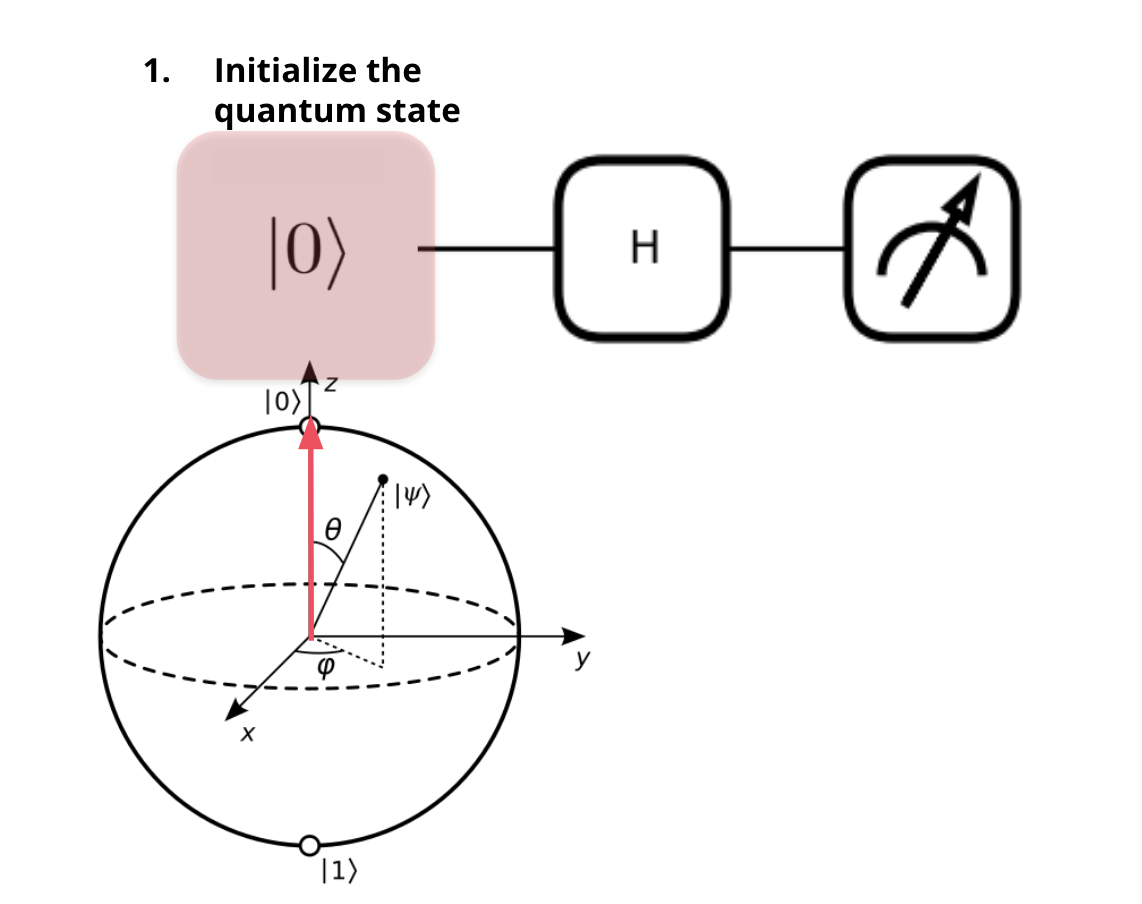

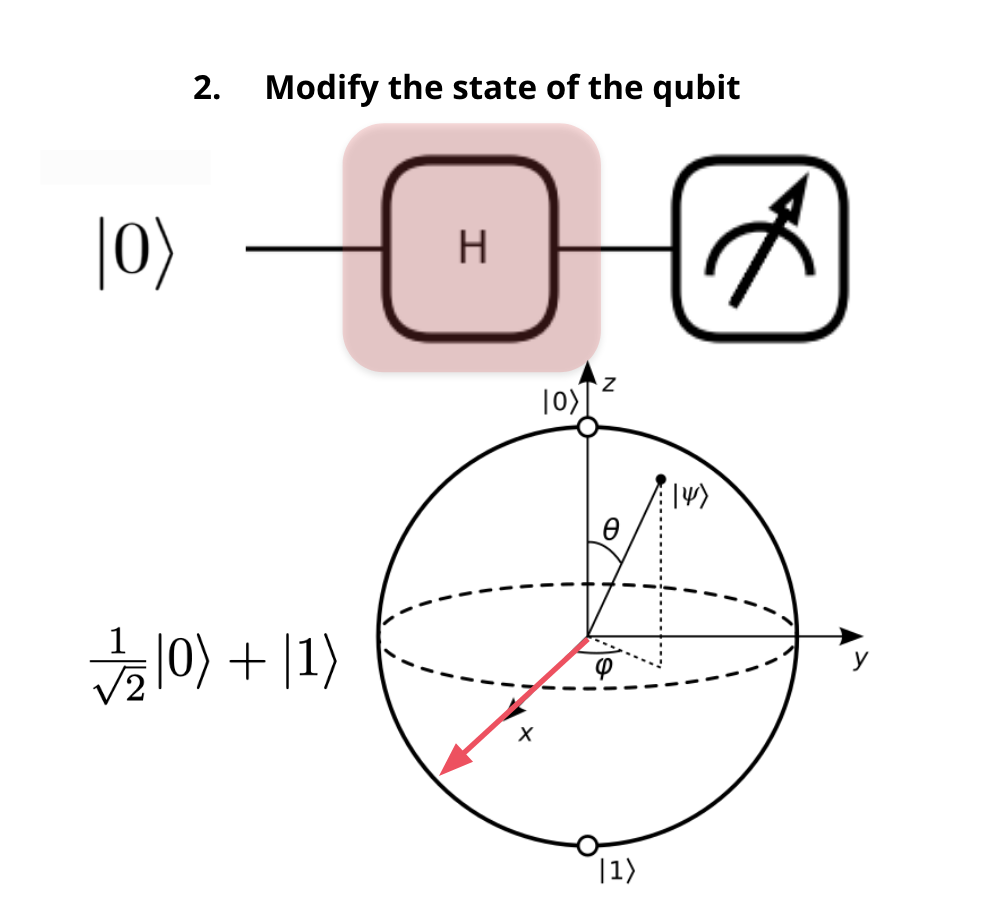

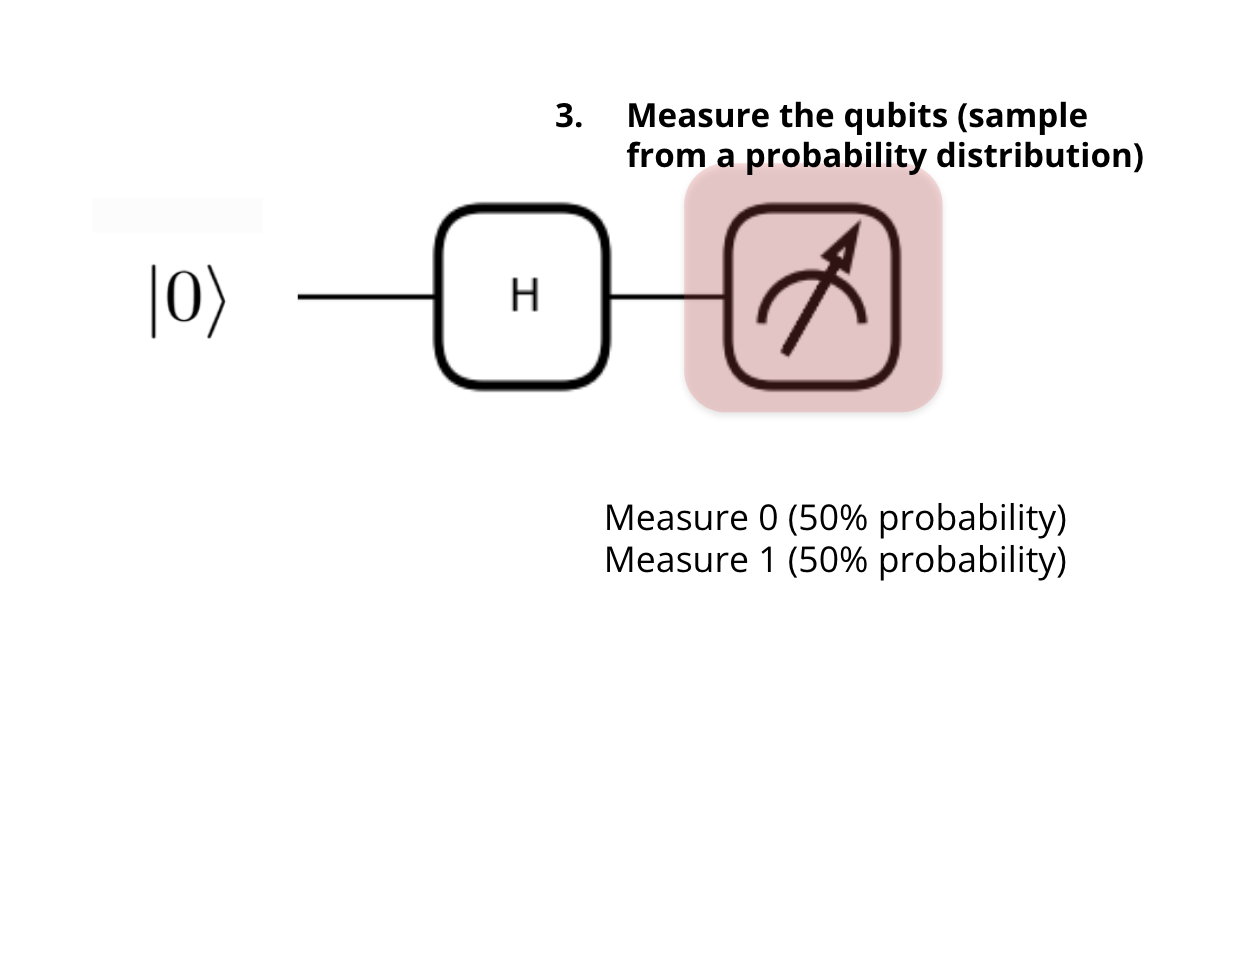